Tax revenue is defined as the revenues collected from taxes on income and profits, social security contributions, taxes levied on goods and services, payroll taxes, taxes on the ownership and transfer of property, and other taxes. Total tax revenue as a percentage of GDP indicates the share of a country's output that is collected by the government through taxes. It can be regarded as one measure of the degree to which the government controls the economy's resources. The tax burden is measured by taking the total tax revenues received as a percentage of GDP. This indicator relates to government as a whole (all government levels) and is measured in million USD and percentage of GDP.

https://data.oecd.org/tax/tax-revenue.htm

https://www.cfr.org/backgrounder/inequality-and-tax-rates-global-comparison

Gross domestic product (GDP) is the standard measure of the value added created through the production of goods and services in a country during a certain period. As such, it also measures the income earned from that production, or the total amount spent on final goods and services (less imports). While GDP is the single most important indicator to capture economic activity, it falls short of providing a suitable measure of people's material well-being for which alternative indicators may be more appropriate. This indicator is based on nominal GDP (also called GDP at current prices or GDP in value) and is available in different measures: US dollars and US dollars per capita (current PPPs). All OECD countries compile their data according to the 2008 System of National Accounts (SNA). This indicator is less suited for comparisons over time, as developments are not only caused by real growth, but also by changes in prices and PPPs.

https://data.oecd.org/gdp/gross-domestic-product-gdp.htm

In [54]:
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)
from plotly import tools

import plotly_express as px

In [33]:
rev = pd.read_csv('tax_rev.csv')

### OECD's Countries Tax Rates as Percentage of GDP, 2016

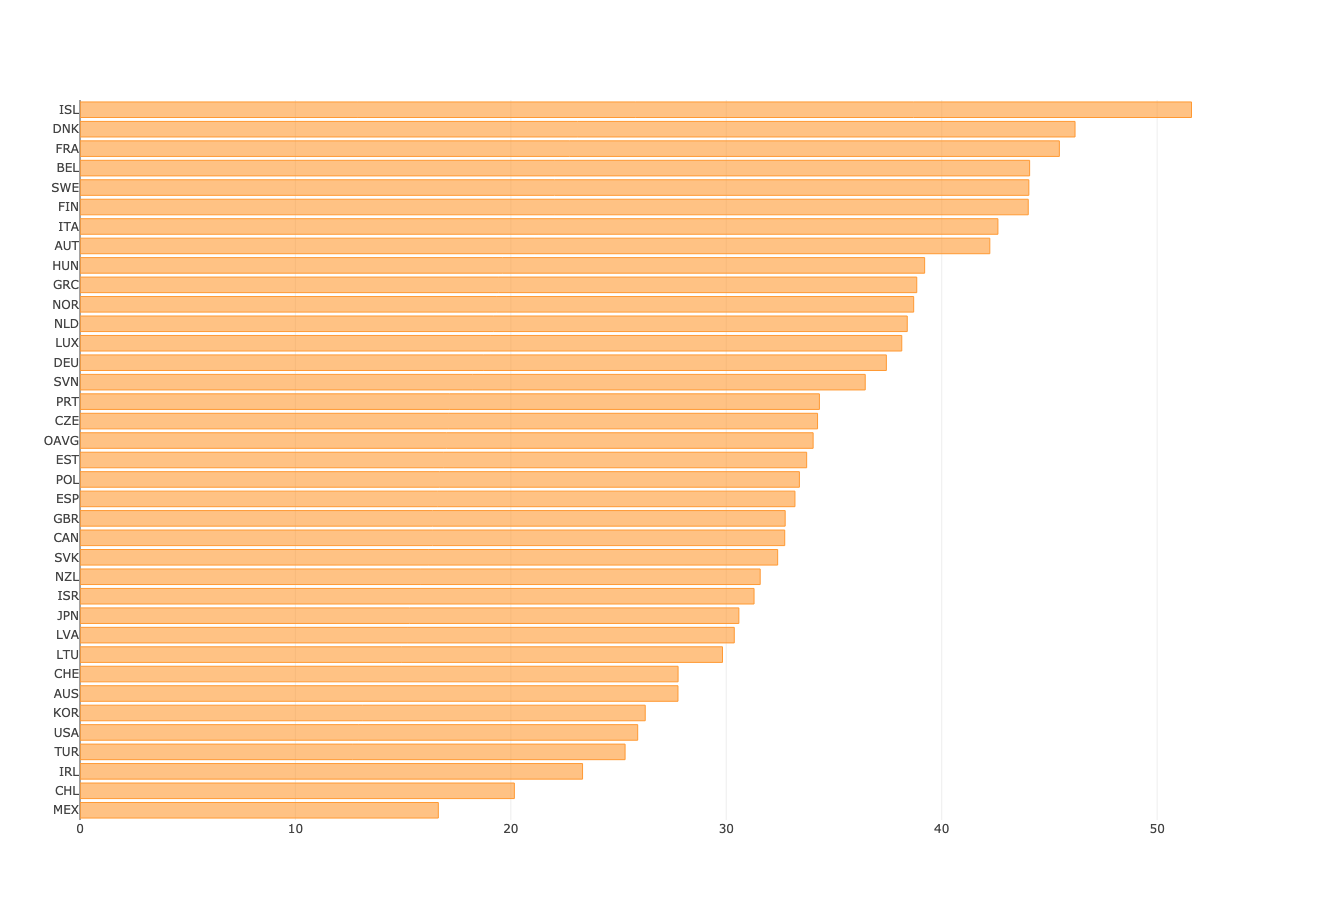

In [43]:
rev = rev[(rev['TIME']==2016) & (rev['MEASURE']=='PC_GDP')].sort_values(by='Value', ascending=True)

layout = cf.Layout(
    height=900,
    width=900)
rev.set_index('LOCATION')['Value'].iplot(kind='bar', orientation='h',theme='white', showgrid=False, layout=layout)

In [52]:
gdp = pd.read_csv('gdp.csv')

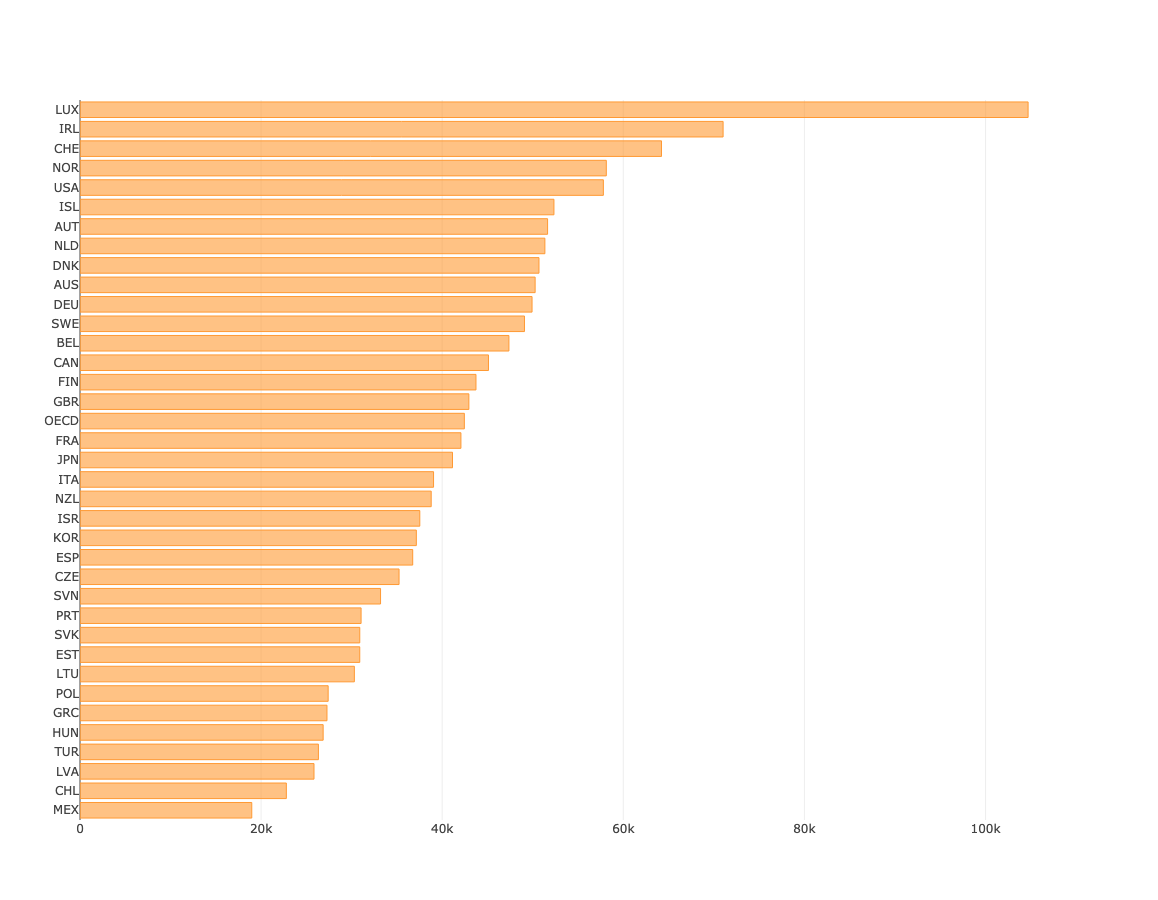

In [53]:
gdp = gdp[(gdp['TIME']==2016) & (gdp['MEASURE']=='USD_CAP')].sort_values(by='Value', ascending=True)
gdp.set_index('LOCATION')['Value'].iplot(kind='bar', orientation='h',theme='white', showgrid=False, layout=layout)

In [74]:
gdp = pd.read_csv('gdp.csv')
gdp = gdp[gdp['MEASURE']=='USD_CAP'].sort_values(['TIME', 'Value'], ascending=[True, True])
gdp = gdp[(gdp['TIME'] >= 1980) & (gdp['TIME'] <= 2016)]
gdp.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
1514,KOR,GDP,TOT,USD_CAP,A,1980,2400.824267,NaN
2618,TUR,GDP,TOT,USD_CAP,A,1980,4099.969493,E
1710,MEX,GDP,TOT,USD_CAP,A,1980,4938.446663,E
2162,PRT,GDP,TOT,USD_CAP,A,1980,5740.998508,E
1220,IRL,GDP,TOT,USD_CAP,A,1980,6602.806173,E


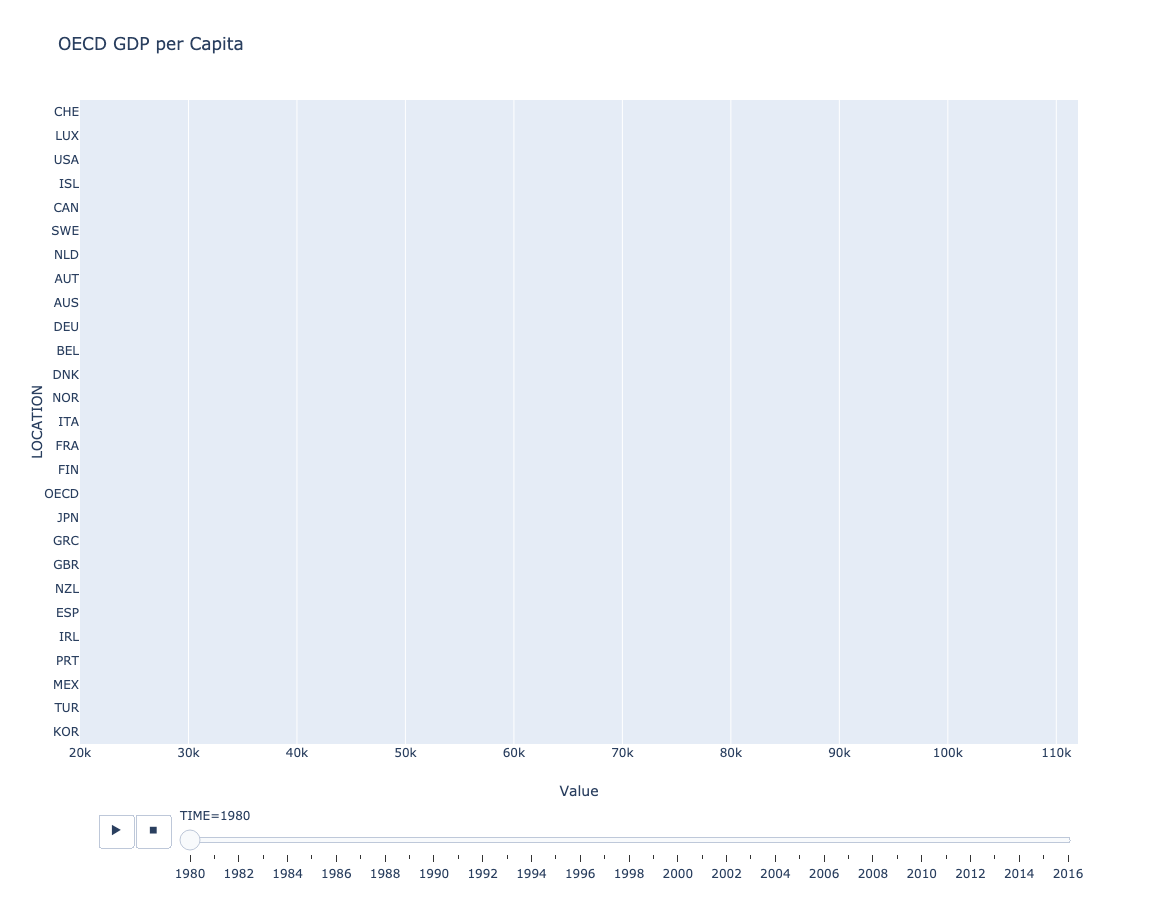

In [75]:
px.bar(gdp, x='Value', y='LOCATION', orientation='h',hover_name="LOCATION", animation_frame="TIME", title='OECD GDP per Capita',
             width=900, height=900, range_x=[20000,112000])

In [66]:
gdp['Value'].max()

110906.3924